In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

In [2]:
df = pd.read_csv("./data/Data_Refined.csv")

In [3]:
df.shape

(119892, 31)

In [4]:
df.head()

,age,ageCond,birthday,budam,track,weather,hrName,hrNo,hrTool,ord,...,wgHr,wgJk,hrSpd,age_day,trackCat,tr1,tr2,topCntY,topCntT,ills
0,3,3세,2020-04-16,별정A,건조 (2%),맑음,패스트건,46029,"계란형큰,망사+,눈가면-",1,...,496,0,15.990160,1018,건조,8,2,4,5,7
1,3,연령오픈,2020-04-16,핸디캡,건조 (3%),비,패스트건,46029,"계란형큰,망사",2,...,495,0,16.203704,1060,건조,9,2,4,5,6
2,3,연령오픈,2020-04-16,핸디캡,건조 (4%),흐림,패스트건,46029,"계란형큰,망사",3,...,487,0,15.911873,1093,건조,11,1,4,5,5
3,3,연령오픈,2020-04-16,핸디캡,양호 (8%),맑음,패스트건,46029,"계란형큰,망사",1,...,497,0,16.018307,1130,양호,10,1,4,5,19
4,3,연령오픈,2020-04-16,핸디캡,다습 (10%),맑음,패스트건,46029,"계란형큰,망사",9,...,497,0,15.355086,1163,다습,9,1,4,5,12


In [5]:
경주마정보 = pd.read_csv("./data/경주마정보_origin.csv")
진료정보 = pd.read_csv("./data/마필진료정보_origin.csv")
훈련정보 = pd.read_csv("./data/마필훈련정보_origin.csv")

In [6]:
경주마정보.shape, 진료정보.shape, 훈련정보.shape

((56445, 26), (207804, 8), (2020082, 15))

In [7]:
df2 = df[df['rank'] == '국6등급']

In [8]:
df2.isnull().sum().sort_values(ascending=False)

age         0
rcNo        0
topCntT     0
topCntY     0
tr2         0
tr1         0
trackCat    0
age_day     0
hrSpd       0
wgJk        0
wgHr        0
wgBudam     0
sex         0
rcDist      0
rcTime      0
rcDate      0
ageCond     0
rating      0
rank        0
plcOdds     0
meet        0
ordBigo     0
ord         0
hrTool      0
hrNo        0
hrName      0
weather     0
track       0
budam       0
birthday    0
ills        0
dtype: int64

In [9]:
from scipy.stats import *

In [10]:
df2 = df[df['rank'] == '국6등급']

In [11]:
df3 = df2.query('hrSpd > 13.5')

In [12]:
shapiro(df3['hrSpd'].sort_values())

c:\Users\yjg10\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9875837564468384, pvalue=7.66510259985675e-43)

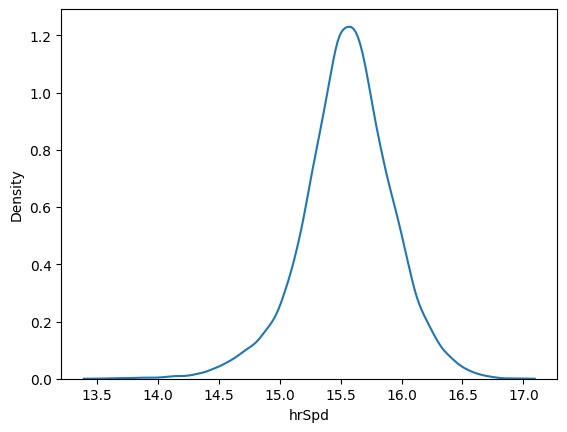

In [13]:
plt.figure()
sns.kdeplot(data = df3, x = 'hrSpd')
plt.show()

In [14]:
anderson(df3['hrSpd'].sort_values(), dist = 'norm')

AndersonResult(statistic=68.85835973523353, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=15.55376067874739, scale=0.372650320052712)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [20]:
kstest(df3['hrSpd'], 'norm', args = (df3['hrSpd'].mean(), df3['hrSpd'].std()))

KstestResult(statistic=0.04339731943789421, pvalue=3.1072172484710445e-46, statistic_location=15.384615384615383, statistic_sign=-1)

In [21]:
?kstest

Signature: kstest(rvs, cdf, args=(), N=20, alternative='two-sided', method='auto')
Docstring:
Performs the (one-sample or two-sample) Kolmogorov-Smirnov test for
goodness of fit.

The one-sample test compares the underlying distribution F(x) of a sample
against a given distribution G(x). The two-sample test compares the
underlying distributions of two independent samples. Both tests are valid
only for continuous distributions.

Parameters
----------
rvs : str, array_like, or callable
    If an array, it should be a 1-D array of observations of random
    variables.
    If a callable, it should be a function to generate random variables;
    it is required to have a keyword argument `size`.
    If a string, it should be the name of a distribution in `scipy.stats`,
    which will be used to generate random variables.
cdf : str, array_like or callable
    If array_like, it should be a 1-D array of observations of random
    variables, and the two-sample test is performed
    (and rvs must